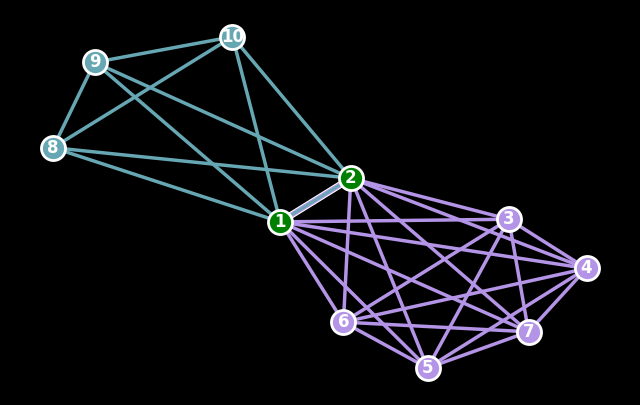

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# 原始边
edges = [
    ('1','2'), ('1','8'), ('1','9'), ('1','10'),
    ('1','3'), ('1','4'), ('1','5'), ('1','6'), ('1','7'),
    ('2','8'), ('2','9'), ('2','10'),
    ('2','3'), ('2','4'), ('2','5'), ('2','6'), ('2','7'),
    ('3','4'), ('3','5'), ('3','6'), ('3','7'),
    ('4','5'), ('4','6'), ('4','7'),
    ('5','6'), ('5','7'),
    ('6','7'),
    ('8','9'), ('8','10'), ('9','10')
]

# community assignment
edge_comms = {
    ('1','2'): [0,1],
    ('1','8'): [1], ('1','9'): [1], ('1','10'): [1],
    ('1','3'): [0], ('1','4'): [0], ('1','5'): [0], ('1','6'): [0], ('1','7'): [0],
    ('2','8'): [1], ('2','9'): [1], ('2','10'): [1],
    ('2','3'): [0], ('2','4'): [0], ('2','5'): [0], ('2','6'): [0], ('2','7'): [0],
    ('3','4'): [0], ('3','5'): [0], ('3','6'): [0], ('3','7'): [0],
    ('4','5'): [0], ('4','6'): [0], ('4','7'): [0],
    ('5','6'): [0], ('5','7'): [0], ('6','7'): [0],
    ('8','9'): [1], ('8','10'): [1], ('9','10'): [1],
}

G = nx.Graph()
G.add_edges_from(edges)

# 自动布局（不会缩到一个角落）
pos = nx.spring_layout(G, seed=42, k=0.85)

fig, ax = plt.subplots(figsize=(8, 5), facecolor='black')
ax.set_facecolor('black')
plt.axis('off')

right_nodes = {'3','4','5','6','7'}
left_nodes = {'8','9','10'}
bridge_nodes = {'1','2'}

nx.draw_networkx_nodes(G, pos, nodelist=list(right_nodes),
                       node_color="#b494e6", edgecolors="white", linewidths=2)
nx.draw_networkx_nodes(G, pos, nodelist=list(left_nodes),
                       node_color="#66a7b3", edgecolors="white", linewidths=2)
nx.draw_networkx_nodes(G, pos, nodelist=list(bridge_nodes),
                       node_color="green", edgecolors="white", linewidths=2)

edges_comm0 = [e for e,c in edge_comms.items() if c == [0]]
edges_comm1 = [e for e,c in edge_comms.items() if c == [1]]
edge_both   = [e for e,c in edge_comms.items() if sorted(c)==[0,1]]

nx.draw_networkx_edges(G, pos, edgelist=edges_comm0, width=2.5, edge_color="#b494e6")
nx.draw_networkx_edges(G, pos, edgelist=edges_comm1, width=2.5, edge_color="#66a7b3")

# overlapping edge
if edge_both:
    nx.draw_networkx_edges(G, pos, edgelist=edge_both, width=5, edge_color="white")
    nx.draw_networkx_edges(G, pos, edgelist=edge_both, width=3.5, edge_color="#b494e6")
    nx.draw_networkx_edges(G, pos, edgelist=edge_both, width=2, edge_color="#66a7b3")

nx.draw_networkx_labels(G, pos, font_color="white", font_size=12, font_weight="bold")

plt.show()


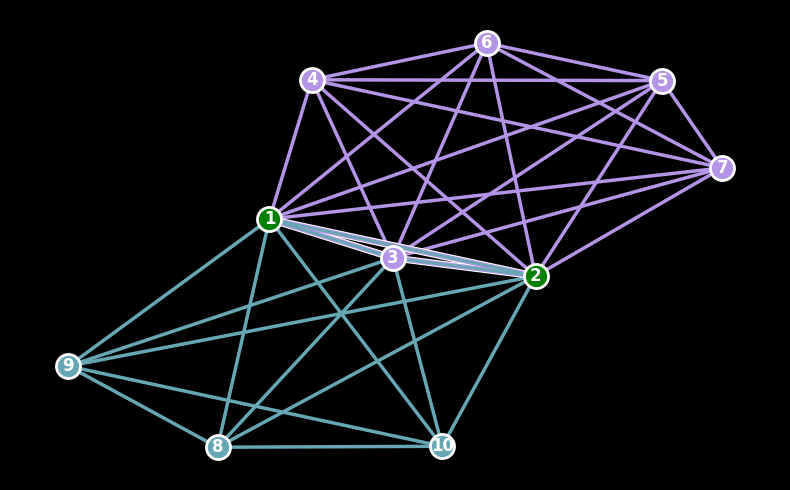

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

# ===== 1. 原始边 (Graph 2) =====
edges = [
    ('1','2'), ('1','3'), ('1','4'), ('1','5'), ('1','6'), ('1','7'),
    ('1','8'), ('1','9'), ('1','10'),
    ('2','3'), ('2','4'), ('2','5'), ('2','6'), ('2','7'),
    ('2','8'), ('2','9'), ('2','10'),
    ('3','4'), ('3','5'), ('3','6'), ('3','7'),
    ('3','8'), ('3','9'), ('3','10'),
    ('4','5'), ('4','6'), ('4','7'),
    ('5','6'), ('5','7'),
    ('6','7'),
    ('8','9'), ('8','10'), ('9','10'),
]

# ===== 2. 社区归属 (来自 SCIP 的 edge assignments, K=3) =====
edge_comms = {
    ('1','2'):  [0, 1, 2],
    ('1','3'):  [0, 1, 2],
    ('1','4'):  [0, 2],
    ('1','5'):  [0, 2],
    ('1','6'):  [0, 2],
    ('1','7'):  [0, 2],
    ('1','8'):  [1],
    ('1','9'):  [1],
    ('1','10'): [1],

    ('2','3'):  [0, 1, 2],
    ('2','4'):  [0, 2],
    ('2','5'):  [0, 2],
    ('2','6'):  [0, 2],
    ('2','7'):  [0, 2],
    ('2','8'):  [1],
    ('2','9'):  [1],
    ('2','10'): [1],

    ('3','4'):  [0, 2],
    ('3','5'):  [0, 2],
    ('3','6'):  [0, 2],
    ('3','7'):  [0, 2],
    ('3','8'):  [1],
    ('3','9'):  [1],
    ('3','10'): [1],

    ('4','5'):  [0, 2],
    ('4','6'):  [0, 2],
    ('4','7'):  [0, 2],
    ('5','6'):  [0, 2],
    ('5','7'):  [0, 2],
    ('6','7'):  [0, 2],

    ('8','9'):  [1],
    ('8','10'): [1],
    ('9','10'): [1],
}

# ===== 3. 建图 =====
G = nx.Graph()
G.add_edges_from(edges)

# 自动布局
pos = nx.spring_layout(G, seed=42, k=0.85)

# ===== 4. 画图底板设置 =====
fig, ax = plt.subplots(figsize=(8, 5), facecolor='black')
ax.set_facecolor('black')
plt.axis('off')

# ===== 5. 节点分组着色 =====
right_nodes = {'3','4','5','6','7'}   # 右侧大团
left_nodes = {'8','9','10'}          # 左侧小团
bridge_nodes = {'1','2'}             # 桥节点

nx.draw_networkx_nodes(
    G, pos, nodelist=list(right_nodes),
    node_color="#b494e6", edgecolors="white", linewidths=2
)
nx.draw_networkx_nodes(
    G, pos, nodelist=list(left_nodes),
    node_color="#66a7b3", edgecolors="white", linewidths=2
)
nx.draw_networkx_nodes(
    G, pos, nodelist=list(bridge_nodes),
    node_color="green", edgecolors="white", linewidths=2
)

# ===== 6. 边分组着色（修正筛选逻辑，保证所有边都画出来） =====
# 把 “包含 0 但不含 1” 的边视为右边社群主色（紫）
edges_comm0 = [e for e, c in edge_comms.items() if 0 in c and 1 not in c]
# 把 “包含 1 但不含 0” 的边视为左边社群主色（蓝）
edges_comm1 = [e for e, c in edge_comms.items() if 1 in c and 0 not in c]
# 同时包含 0 和 1 的边（[0,1]、[0,1,2]）视为 overlap，高亮
edge_both   = [e for e, c in edge_comms.items() if 0 in c and 1 in c]

nx.draw_networkx_edges(G, pos, edgelist=edges_comm0, width=2.5, edge_color="#b494e6")
nx.draw_networkx_edges(G, pos, edgelist=edges_comm1, width=2.5, edge_color="#66a7b3")

if edge_both:
    nx.draw_networkx_edges(G, pos, edgelist=edge_both, width=5,   edge_color="white")
    nx.draw_networkx_edges(G, pos, edgelist=edge_both, width=3.5, edge_color="#b494e6")
    nx.draw_networkx_edges(G, pos, edgelist=edge_both, width=2,   edge_color="#66a7b3")

# ===== 7. 画标签 =====
nx.draw_networkx_labels(G, pos, font_color="white", font_size=12, font_weight="bold")

plt.tight_layout()
plt.show()
